
### 🏡 Tennessee Housing Data Analysis (2013–2016)

---

### 📌 Introduction

This project explores residential property sales data from Tennessee, between 2013 and 2016. The goal is to analyze patterns and trends in the housing market using Python, focusing on:

* Time-based market activity
* Price per square foot analysis
* City-based comparisons
* Feature relationships (e.g., property age vs. sale price)




### 📥 Data Importation & Inspection 🔍

In [ ]:
import numpy as np
import pandas as pd

#import data
nhd_df = pd.read_csv('Nashville_housing_data_2013_2016.csv')
nhd_df

,Unnamed: 0.1,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,56631,56631,093 13 0B 274.00,RESIDENTIAL CONDO,320 11TH AVE S,274.0,NASHVILLE,2016-10-06,210000,20161007-0106599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56632,56632,56632,093 13 0D 044.00,RESIDENTIAL CONDO,700 12TH AVE S,608.0,NASHVILLE,2016-10-25,338000,20161101-0115186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56633,56633,56633,093 13 0D 048.00,RESIDENTIAL CONDO,700 12TH AVE S,613.0,NASHVILLE,2016-10-04,742000,20161010-0106889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56634,56634,56634,093 13 0D 056.00,RESIDENTIAL CONDO,700 12TH AVE S,708.0,NASHVILLE,2016-10-26,320000,20161031-0114730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#check data
nhd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.1                       56636 non-null  int64  
 1   Unnamed: 0                         56636 non-null  int64  
 2   Parcel ID                          56636 non-null  object 
 3   Land Use                           56636 non-null  object 
 4   Property Address                   56477 non-null  object 
 5   Suite/ Condo   #                   6109 non-null   object 
 6   Property City                      56477 non-null  object 
 7   Sale Date                          56636 non-null  object 
 8   Sale Price                         56636 non-null  int64  
 9   Legal Reference                    56636 non-null  object 
 10  Sold As Vacant                     56636 non-null  object 
 11  Multiple Parcels Involved in Sale  56636 non-null  obj


### 🧹 Data Cleaning & Preparation





*   Check for duplicate rows



In [ ]:
#checking for duplicates
duplicates = nhd_df[nhd_df.duplicated()]
duplicates

,Unnamed: 0.1,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath


* Drop irrelevant columns

In [ ]:
#removing unnecessary columns
nhd_df.columns
nhd_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Suite/ Condo   #', 'Legal Reference'], inplace=True)
nhd_df.head()

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,Address,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,NASHVILLE,2013-01-24,132000,No,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,2013-01-11,191500,No,No,"STINSON, LAURA M.",1802 STEWART PL,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,2013-01-18,202000,No,No,"NUNES, JARED R.",2761 ROSEDALE PL,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,2013-01-18,32000,No,No,"WHITFORD, KAREN",224 PEACHTREE ST,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,2013-01-23,102000,No,No,"HENDERSON, JAMES P. & LYNN P.",316 LUTIE ST,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


* Clean and standardize text data

In [ ]:
#clean all string columns: strip whitespace and capitalize first letter of each word
for col in nhd_df.select_dtypes(include='object').columns:
  nhd_df[col] = nhd_df[col].str.strip()

#clean column names: capitalize first letter of each word
nhd_df.columns = [col.strip().title() for col in nhd_df.columns]


In [ ]:
nhd_df.columns

Index(['Land Use', 'Property Address', 'Property City', 'Sale Date',
       'Sale Price', 'Sold As Vacant', 'Multiple Parcels Involved In Sale',
       'Owner Name', 'Address', 'City', 'State', 'Acreage', 'Tax District',
       'Neighborhood', 'Image', 'Land Value', 'Building Value', 'Total Value',
       'Finished Area', 'Foundation Type', 'Year Built', 'Exterior Wall',
       'Grade', 'Bedrooms', 'Full Bath', 'Half Bath'],
      dtype='object')

* Remove null values

In [ ]:
#removing null
nhd_df.dropna(inplace=True)
nhd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23721 entries, 1 to 56615
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Parcel Id                          23721 non-null  object 
 1   Land Use                           23721 non-null  object 
 2   Property Address                   23721 non-null  object 
 3   Property City                      23721 non-null  object 
 4   Sale Date                          23721 non-null  object 
 5   Sale Price                         23721 non-null  int64  
 6   Sold As Vacant                     23721 non-null  object 
 7   Multiple Parcels Involved In Sale  23721 non-null  object 
 8   Owner Name                         23721 non-null  object 
 9   Address                            23721 non-null  object 
 10  City                               23721 non-null  object 
 11  State                              23721 non-null  object 




*  Check and Correct Typos




In [ ]:
print(nhd_df['Land Use'].unique())

['SINGLE FAMILY' 'VACANT RES LAND' 'DUPLEX' 'ZERO LOT LINE' 'TRIPLEX'
 'RESIDENTIAL COMBO/MISC' 'CHURCH' 'QUADPLEX' 'STRIP SHOPPING CENTER'
 'DORMITORY/BOARDING HOUSE' 'PARSONAGE' 'SPLIT CLASS' 'GREENBELT'
 'MOBILE HOME' 'OFFICE BLDG (ONE OR TWO STORIES)'
 'VACANT RESIDENTIAL LAND' 'FOREST' 'CONVENIENCE MARKET WITHOUT GAS'
 'CLUB/UNION HALL/LODGE' 'LIGHT MANUFACTURING'
 'ONE STORY GENERAL RETAIL STORE' 'DAY CARE CENTER'
 'APARTMENT: LOW RISE (BUILT SINCE 1960)'
 'TERMINAL/DISTRIBUTION WAREHOUSE' 'NON-PROFIT CHARITABLE SERVICE'
 'GREENBELT/RES\r\nGRRENBELT/RES']


In [ ]:
# replacing duplicate error values
replace_map = {'VACANT RES LAND': 'VACANT RESIDENTIAL LAND', 'GREENBELT/RES\r\nGRRENBELT/RES': 'GREENBELT'}
nhd_df['Land Use'] = nhd_df['Land Use'].replace(replace_map)

In [ ]:
print(nhd_df['Land Use'].unique())

['SINGLE FAMILY' 'VACANT RESIDENTIAL LAND' 'DUPLEX' 'ZERO LOT LINE'
 'TRIPLEX' 'RESIDENTIAL COMBO/MISC' 'CHURCH' 'QUADPLEX'
 'STRIP SHOPPING CENTER' 'DORMITORY/BOARDING HOUSE' 'PARSONAGE'
 'SPLIT CLASS' 'GREENBELT' 'MOBILE HOME'
 'OFFICE BLDG (ONE OR TWO STORIES)' 'FOREST'
 'CONVENIENCE MARKET WITHOUT GAS' 'CLUB/UNION HALL/LODGE'
 'LIGHT MANUFACTURING' 'ONE STORY GENERAL RETAIL STORE' 'DAY CARE CENTER'
 'APARTMENT: LOW RISE (BUILT SINCE 1960)'
 'TERMINAL/DISTRIBUTION WAREHOUSE' 'NON-PROFIT CHARITABLE SERVICE']


* Convert columns to appropriate data types

In [ ]:
# changing dtype of 'Sale Date' to datetime
nhd_df['Sale Date'] = pd.to_datetime(nhd_df['Sale Date'])
# changing dtype of year to int
nhd_df['Year Built'] = nhd_df['Year Built'].astype(int)

* Check and Remove Outliers

In [ ]:
numerical_cols = nhd_df.select_dtypes(include=['int64', 'float64']).columns
display(nhd_df[numerical_cols].sample(10))

,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
19461,442000,0.41,3228.0,270000.0,170200.0,440200.0,1979.0,1946,2.0,2.0,0.0
49674,150000,0.25,3928.0,17000.0,57100.0,74100.0,1050.0,1972,3.0,1.0,0.0
36516,130000,0.65,6829.0,22000.0,74000.0,96000.0,1408.0,1955,3.0,1.0,0.0
10910,139900,0.18,3628.0,26000.0,239800.0,265800.0,2022.0,1926,3.0,2.0,1.0
36517,81500,0.32,6931.0,25000.0,64000.0,89000.0,975.0,1956,2.0,1.0,0.0
4860,146000,0.39,4130.0,26000.0,109400.0,135400.0,1627.0,1952,2.0,1.0,0.0
9107,131270,0.32,6233.0,21000.0,82800.0,104900.0,1275.0,1965,3.0,1.0,1.0
55369,132000,0.23,3926.0,21500.0,85600.0,107100.0,1079.0,1997,3.0,2.0,0.0
14437,215000,0.97,6828.0,40000.0,183200.0,223200.0,2822.0,1964,4.0,2.0,1.0
1973,465000,1.69,9226.0,236300.0,161800.0,398100.0,3170.0,1972,3.0,3.0,0.0


In [ ]:
# checking where sales price is lower than total value
Outlier = nhd_df[nhd_df['Sale Price'] < nhd_df['Total Value']]
Outlier[['Sale Price', 'Total Value']]

,Sale Price,Total Value
3,32000,268700.0
4,102000,164800.0
5,93736,113300.0
7,44000,84300.0
8,49900,84300.0
...,...,...
56404,129900,247800.0
56407,104900,107700.0
56467,75000,75200.0
56524,17500,128700.0


In [ ]:
nhd_df.shape

(23721, 27)

In [ ]:
# Keep properties where Sale Price is at least 80% of Total Value, and remove the rest
nhd_dff = nhd_df[nhd_df['Sale Price'] >= (nhd_df['Total Value'] * 0.80 )]
nhd_dff.shape

(20687, 27)

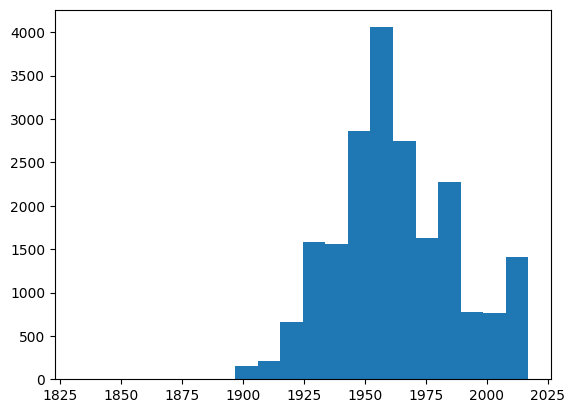

In [ ]:
# exploring year
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(nhd_dff['Year Built'], bins=20)
plt.show()

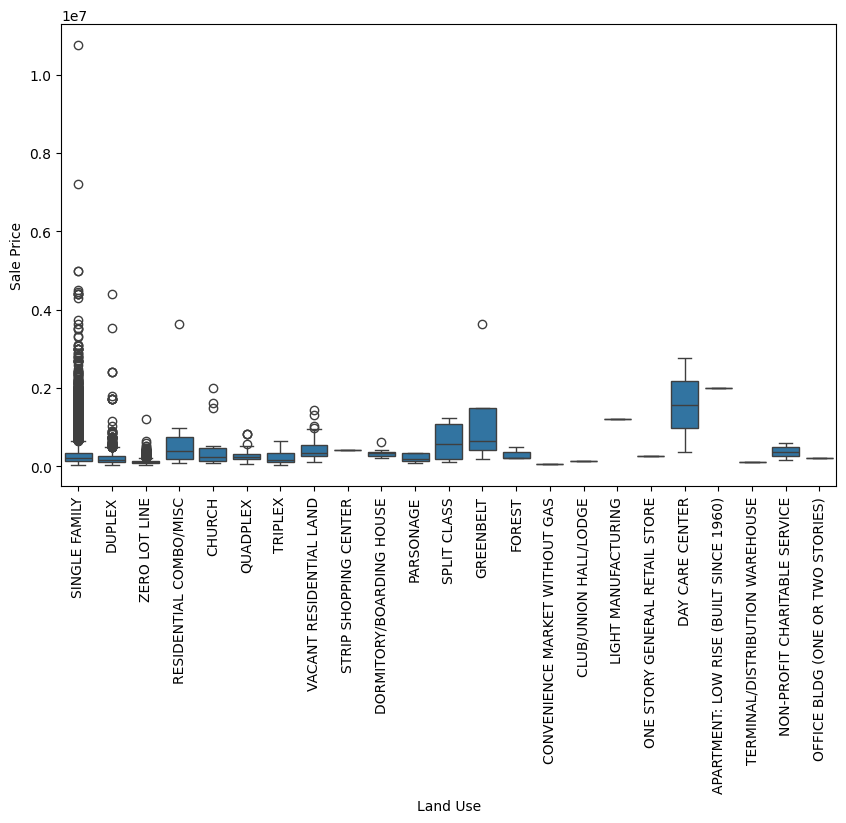

In [ ]:
# more exploration on sales price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Land Use', y='Sale Price', data=nhd_dff)
plt.xticks(rotation=90);


In [ ]:
# investigating one anormaly of land use type
nhd_dffgreenbelt = nhd_dff[nhd_dff['Land Use'] == 'GREENBELT']
nhd_dffgreenbelt

,Parcel Id,Land Use,Property Address,Property City,Sale Date,Sale Price,Sold As Vacant,Multiple Parcels Involved In Sale,Owner Name,Address,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
8406,162 00 0 049.00,GREENBELT,208 BENZING RD,ANTIOCH,2013-10-30,193890,No,Yes,"ROSE, LIOR",208 BENZING RD,...,50100.0,111424.0,1796.0,CRAWL,1925.0,CONC BLK,C,4.0,1.0,0.0
20292,124 00 0 070.00,GREENBELT,3365 HOBSON PIKE,HERMITAGE,2014-08-07,780000,No,No,"RUST, JAMES U., IV",3365 HOBSON PIKE,...,617000.0,824070.0,7150.0,CRAWL,1989.0,BRICK,A,5.0,5.0,0.0
51699,114 00 0 208.00,GREENBELT,7315 SONYA DR,NASHVILLE,2016-07-08,3625000,No,No,"AM INVESTORS NO. 2, LLC & NORWOOD MANOR, LLC",7315 SONYA DR,...,83300.0,253119.0,1458.0,FULL BSMT,1966.0,BRICK,C,3.0,1.0,1.0


In [ ]:
#Removing all outliers on sales price
# Calculate Q1, Q3, and IQR for 'Sale Price'
Q1 = nhd_dff['Sale Price'].quantile(0.25)
Q3 = nhd_dff['Sale Price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
nhd_dff = nhd_dff[(nhd_dff['Sale Price'] >= lower_bound) & (nhd_dff['Sale Price'] <= upper_bound)]
nhd_dff.shape

(19134, 27)

In [ ]:
#saving and retrieving

# Save the cleaned DataFrame to a new CSV file
nhd_dff.to_csv('Nashville_housing_data_finalclean.csv', index=False)
#calling file under a new name
nhdc_df_copy = pd.read_csv('Nashville_housing_data_finalclean.csv')

* Engineered new features

In [ ]:
#Feature Engineering
#creating new columns
nhdc_df_copy['Price_per_SqFt'] = nhdc_df_copy['Sale Price'] / nhdc_df_copy['Finished Area']
nhdc_df_copy['Sale Date'] = pd.to_datetime(nhdc_df_copy['Sale Date'])
nhdc_df_copy['Sale_Year'] = nhdc_df_copy['Sale Date'].dt.year
nhdc_df_copy['Sale_Month'] = nhdc_df_copy['Sale Date'].dt.month
nhdc_df_copy['Property_Age'] = nhdc_df_copy['Sale_Year'] - nhdc_df_copy['Year Built']
nhdc_df_copy['Total_Bathrooms'] = nhdc_df_copy['Full Bath'] + 0.5 * nhdc_df_copy['Half Bath']
nhdc_df_copy['Is_Vacant'] = nhdc_df_copy['Sold As Vacant'].map({'Yes': 1, 'No': 0})
nhdc_df_copy.columns

Index(['Parcel Id', 'Land Use', 'Property Address', 'Property City',
       'Sale Date', 'Sale Price', 'Sold As Vacant',
       'Multiple Parcels Involved In Sale', 'Owner Name', 'Address', 'City',
       'State', 'Acreage', 'Tax District', 'Neighborhood', 'Image',
       'Land Value', 'Building Value', 'Total Value', 'Finished Area',
       'Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms',
       'Full Bath', 'Half Bath', 'Price_per_SqFt', 'Sale_Year', 'Sale_Month',
       'Property_Age', 'Total_Bathrooms', 'Is_Vacant'],
      dtype='object')

* This analysis is only focused on properties built on, so i removed 'Sold As Vacant' column

In [ ]:
#removing empty land sales. this analysis is focused on built properties
nhdc_df_houses_only = nhdc_df_copy[nhdc_df_copy['Sold As Vacant'] == 'No']

nhdc_df_houses_only['Sold As Vacant'].unique()

array(['No'], dtype=object)

* Calling the useful columns to be used for this analysis

In [ ]:
#keep useful columns for analysis
columns_to_keep = [
    'Parcel Id',
    'Land Use',
    'Sale Date',
    'Sale Price',
    'Finished Area',
    'State',
    'City',
    'Property City',
    'Total Value',
    'Year Built',
    'Bedrooms',
    'Total_Bathrooms',
    'Property_Age',
    'Sale_Month',
    'Sale_Year',
    'Price_per_SqFt',
]
nhdc_df_houses_only = nhdc_df_houses_only[columns_to_keep]
nhdc_df_houses_only

,Parcel Id,Land Use,Sale Date,Sale Price,Finished Area,State,City,Property City,Total Value,Year Built,Bedrooms,Total_Bathrooms,Property_Age,Sale_Month,Sale_Year,Price_per_SqFt
0,105 11 0 080.00,SINGLE FAMILY,2013-01-11,191500,1149.00000,TN,NASHVILLE,NASHVILLE,168300.0,1941.0,2.0,1.0,72.0,1,2013,166.666667
1,118 03 0 130.00,SINGLE FAMILY,2013-01-18,202000,2090.82495,TN,NASHVILLE,NASHVILLE,191800.0,2000.0,3.0,2.5,13.0,1,2013,96.612583
2,119 05 0 387.00,SINGLE FAMILY,2013-01-04,93736,1037.00000,TN,NASHVILLE,NASHVILLE,113300.0,1945.0,2.0,1.0,68.0,1,2013,90.391514
3,133 07 0 195.00,SINGLE FAMILY,2013-01-18,90000,1300.00000,TN,NASHVILLE,NASHVILLE,105100.0,1955.0,2.0,1.0,58.0,1,2013,69.230769
4,133 12 0 268.00,SINGLE FAMILY,2013-01-04,120000,1825.00000,TN,NASHVILLE,NASHVILLE,129300.0,1978.0,7.0,2.0,35.0,1,2013,65.753425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19129,165 13 0 021.00,SINGLE FAMILY,2016-10-31,165000,1311.00000,TN,ANTIOCH,ANTIOCH,99700.0,1992.0,3.0,2.0,24.0,10,2016,125.858124
19130,176 01 0 003.00,SINGLE FAMILY,2016-10-13,185000,1758.00000,TN,ANTIOCH,ANTIOCH,130000.0,1996.0,3.0,2.0,20.0,10,2016,105.233220
19131,176 05 0 070.00,SINGLE FAMILY,2016-10-26,214000,2421.00000,TN,ANTIOCH,ANTIOCH,167400.0,1996.0,3.0,3.0,20.0,10,2016,88.393226
19132,176 09 0 003.00,SINGLE FAMILY,2016-10-28,236000,3117.00000,TN,ANTIOCH,ANTIOCH,184300.0,1995.0,3.0,3.0,21.0,10,2016,75.713827


In [ ]:
#saving file
nhdc_df_houses_only.to_csv('nhdc_df_houses_onlyfinal.csv', index=False)


### 📊 Exploratory Data Analysis

---

#### 🕒 Time-Based Analysis

* Counted total number of property sales per year and quarter
* Identified high-activity periods (e.g., Q2 and Q3 were most active)
* Observed general sales trends over time



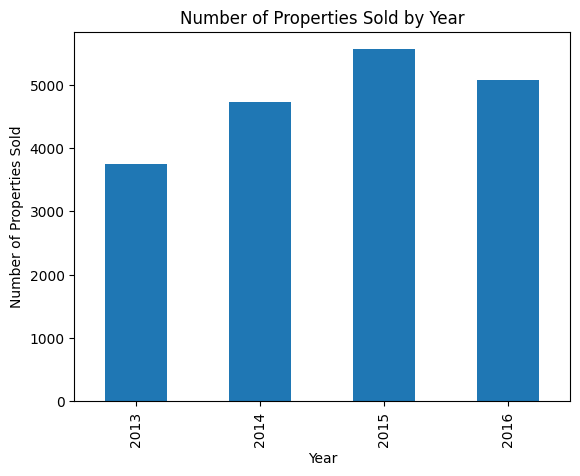

In [ ]:
# plot to show property count by year
nhdc_df_houses_only.groupby('Sale_Year')['Parcel Id'].count().plot(kind='bar')
plt.title('Number of Properties Sold by Year')
plt.xlabel('Year')
plt.ylabel('Number of Properties Sold')
plt.show()

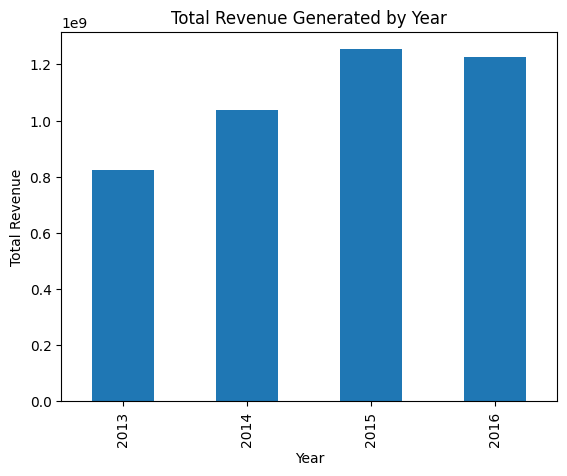

In [ ]:
#total revenu generated by year
nhdc_df_houses_only.groupby('Sale_Year')['Sale Price'].sum().plot(kind='bar')
plt.title('Total Revenue Generated by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

/tmp/ipython-input-264443053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhdc_df_houses_only['Quarter'] = nhdc_df_houses_only['Sale Date'].dt.quarter


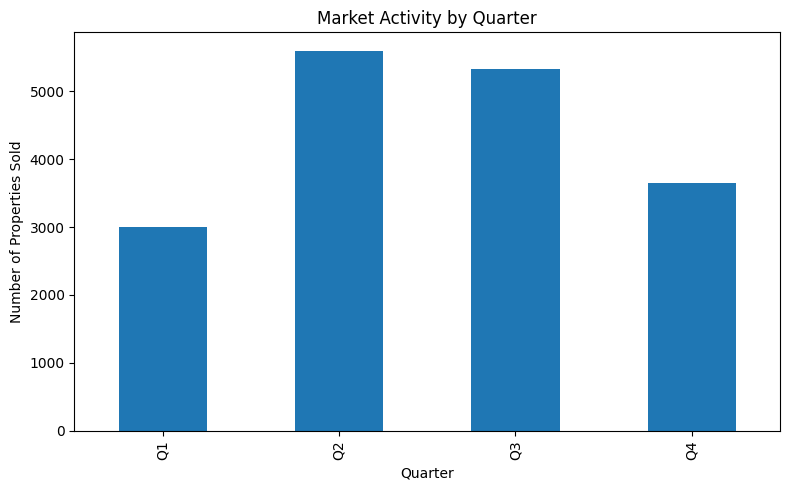

In [ ]:
#market activity by quarter
# Extract the quarter number (1 to 4)
nhdc_df_houses_only['Quarter'] = nhdc_df_houses_only['Sale Date'].dt.quarter
# Count number of sales per quarter
quarterly_sales = nhdc_df_houses_only['Quarter'].value_counts().sort_index()
# Plot
quarterly_sales.plot(kind='bar', figsize=(8,5))
plt.title('Market Activity by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Properties Sold')
plt.xticks(ticks=[0,1,2,3], labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.tight_layout()
plt.show()

####🏙️ Location-Based Analysis

* Compared number of properties sold by city
* Calculated average sale price per city
* Analyzed sale price trends by city over the years


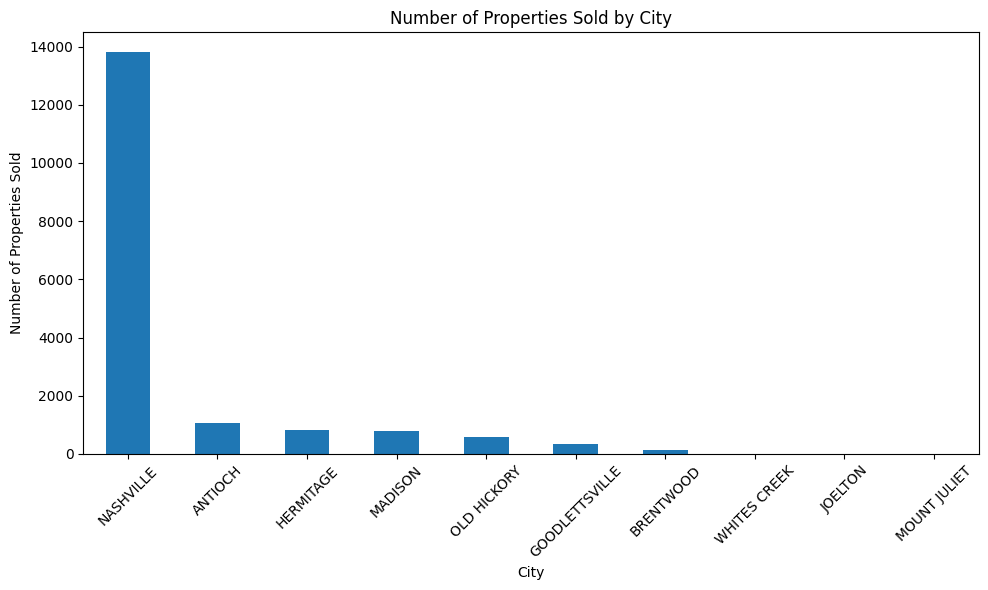

In [ ]:
#comparing sales volume across cities
plt.figure(figsize=(10, 6))
nhdc_df_houses_only['City'].value_counts().plot(kind='bar')
plt.title('Number of Properties Sold by City')
plt.xlabel('City')
plt.ylabel('Number of Properties Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

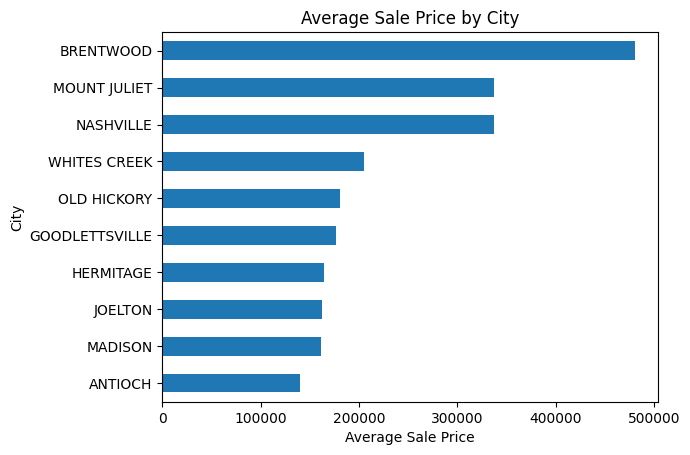

In [ ]:
#Average Sale Price by City
nhdc_df_houses_only.groupby('City')['Sale Price'].mean().sort_values().plot(kind='barh')
plt.title('Average Sale Price by City')
plt.xlabel('Average Sale Price')
plt.show()


) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


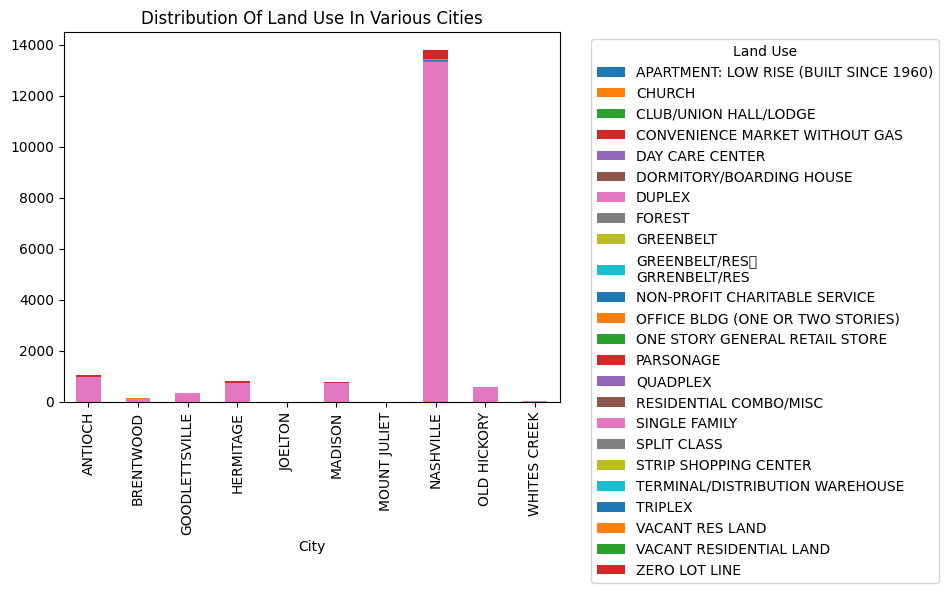

In [ ]:
#property type distribution by city. using land use average
pd.crosstab(nhdc_df_houses_only['City'], nhdc_df_houses_only['Land Use']).plot(kind='bar', stacked=True)
plt.legend(title='Land Use', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Distribution Of Land Use In Various Cities')
plt.show()



#which property domminates which city

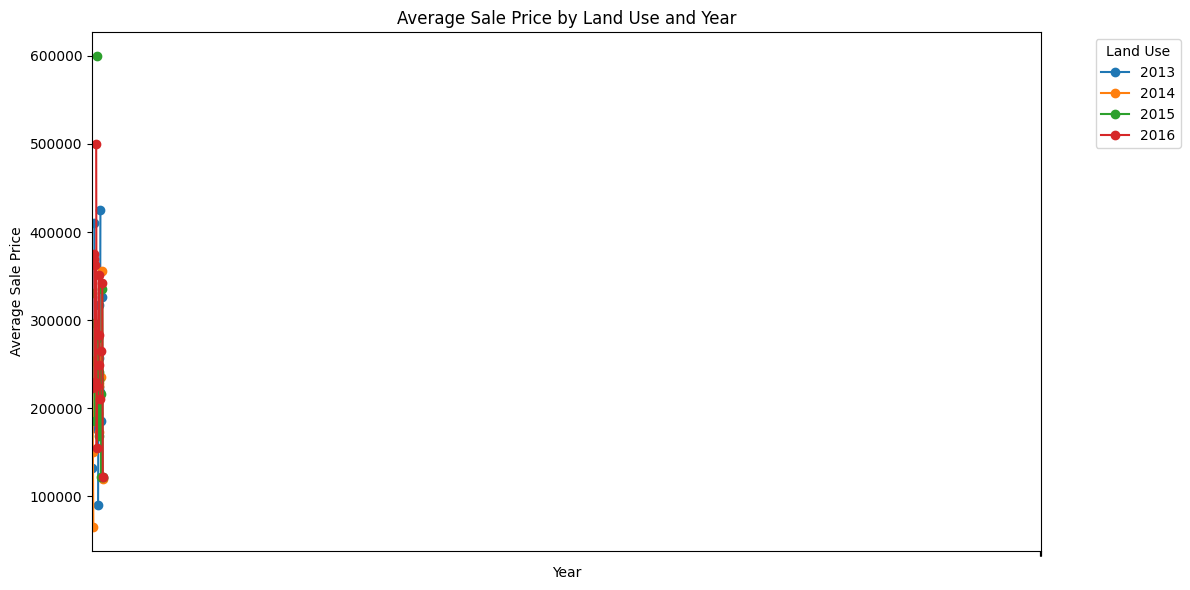

In [ ]:
#line chart of aveage sale price by land use and year, with land use as legend
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Land Use' and 'Sale_Year', calculate the mean sale price
grouped_data = nhdc_df_houses_only.groupby(['Land Use', 'Sale_Year'])['Sale Price'].mean().unstack()

# Plot the trend as a line chart
grouped_data.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Average Sale Price by Land Use and Year')
plt.xlabel('Year')
plt.ylabel('Average Sale Price')
plt.xticks(grouped_data.index, rotation=90) # Use the index for x-axis ticks
plt.legend(title='Land Use', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Land use Analysis

/tmp/ipython-input-589020851.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(land_use_metrics.index, rotation=90, ha='right')
) missing from font(s) DejaVu Sans.
  plt.tight_layout()
) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


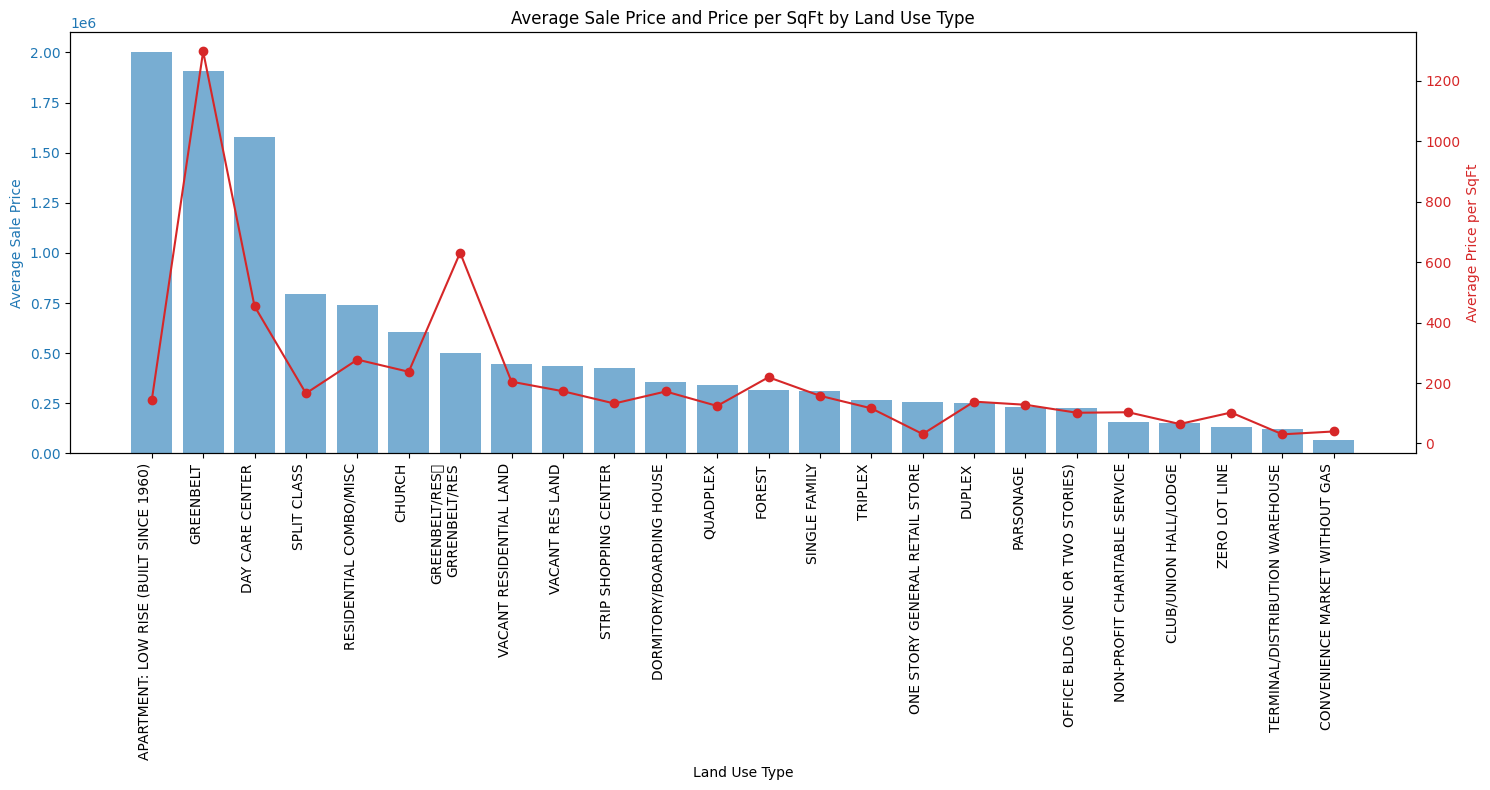

In [ ]:
# Calculate average sale price and average price per sqft by land use
land_use_metrics = nhdc_df_houses_only.groupby('Land Use').agg({
    'Sale Price': 'mean',
    'Price_per_SqFt': 'mean'
}).sort_values(by='Sale Price', ascending=False)

# Create a figure and a set of subplots with two y-axes
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot Average Sale Price on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Land Use Type')
ax1.set_ylabel('Average Sale Price', color=color)
ax1.bar(land_use_metrics.index, land_use_metrics['Sale Price'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(land_use_metrics.index, rotation=90, ha='right')

# Create a second y-axis for Average Price per SqFt
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Price per SqFt', color=color)
ax2.plot(land_use_metrics.index, land_use_metrics['Price_per_SqFt'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average Sale Price and Price per SqFt by Land Use Type')
plt.tight_layout()
plt.show()

) missing from font(s) DejaVu Sans.
  plt.tight_layout()
) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


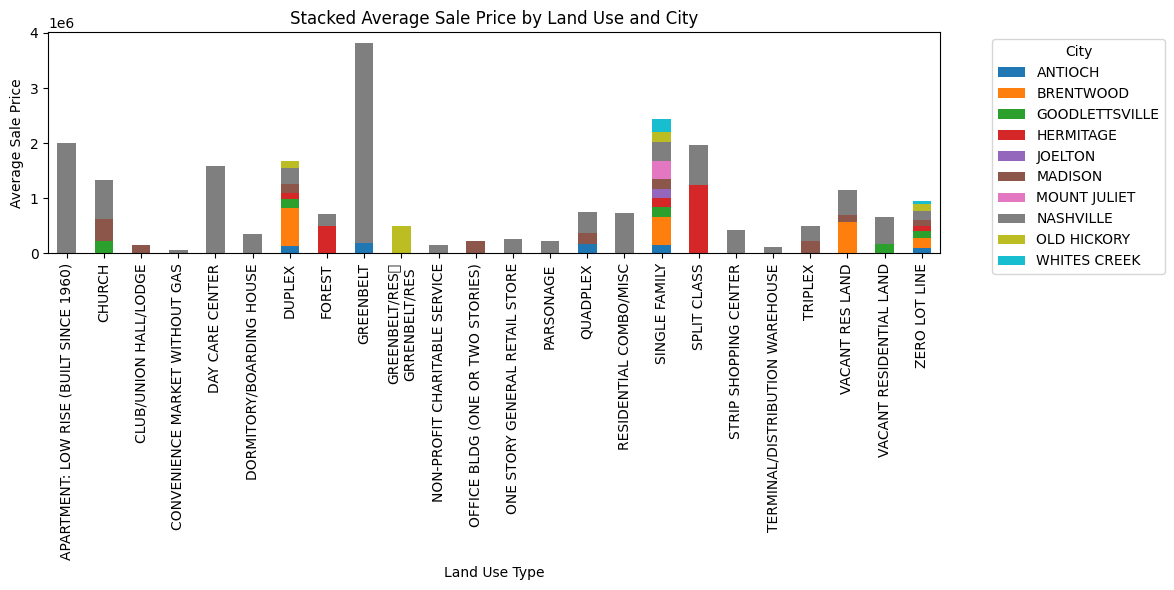

In [ ]:
# Stacked Average Sale Price by Land Use and City
grouped = nhdc_df_houses_only.groupby(['Land Use', 'City'])['Sale Price'].mean().unstack()
grouped.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Stacked Average Sale Price by Land Use and City')
plt.ylabel('Average Sale Price')
plt.xlabel('Land Use Type')
plt.xticks(rotation=90)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#to know variations of prices for properties in different cities

#### 🧱 Feature-Based Analysis

* Compared sale price with:

  * `Property_Age`
* Observed how newer homes or larger homes performed in price and in time


/tmp/ipython-input-48-3833440941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhdc_df_houses_only['Home_Age_Group'] = nhdc_df_houses_only['Property_Age'].apply(lambda x: 'Newer (≤10 yrs)' if x <= 10 else 'Older (>10 yrs)')


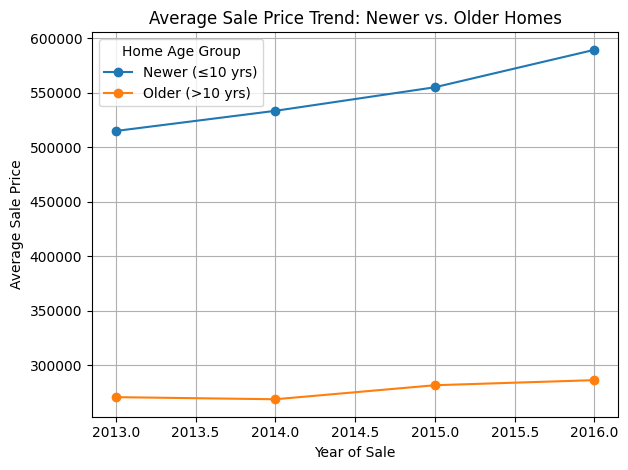

In [ ]:
#newer vs older homes erformance
# Create a new category column based on property age
nhdc_df_houses_only['Home_Age_Group'] = nhdc_df_houses_only['Property_Age'].apply(lambda x: 'Newer (≤10 yrs)' if x <= 10 else 'Older (>10 yrs)')
# Compare average sale price
price_trend = nhdc_df_houses_only.groupby(['Sale_Year', 'Home_Age_Group'])['Sale Price'].mean().unstack()
# Plot the trend
price_trend.plot(kind='line', marker='o')
plt.title('Average Sale Price Trend: Newer vs. Older Homes')
plt.xlabel('Year of Sale')
plt.ylabel('Average Sale Price')
plt.legend(title='Home Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()

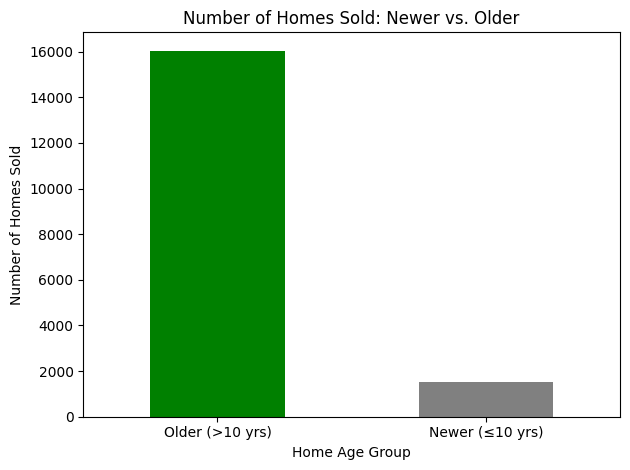

In [ ]:
# Count number of sales by age group
sale_count_by_age = nhdc_df_houses_only['Home_Age_Group'].value_counts()
# Plot
sale_count_by_age.plot(kind='bar', color=['green', 'gray'])
plt.title('Number of Homes Sold: Newer vs. Older')
plt.ylabel('Number of Homes Sold')
plt.xlabel('Home Age Group')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



### 📌 **Key Insights**

#### 🏙️ **City Trends**

* **Nashville** recorded the **highest number of property transactions**.
* It is the **most versatile city**, containing all major land use types in high proportion.
* **Single-family homes** are the most widely distributed across cities, especially in Nashville, followed by **duplexes** and **zero lot line properties**.
* **Brentwood** had the **highest average sale price**, making it the most expensive city in the dataset.

#### 📅 **Seasonality**

* Sales volume **peaks during the mid-year quarters (Q2–Q3)**, indicating a strong seasonal trend in property sales.

#### 🏠 **Property Type Insights**

* **Single-family homes** dominate in quantity sold across the dataset.
* **Day care centers** have the **highest average sale price** among property types.
* **Dormitories** experienced a **notable price increase starting in 2014**, though **sales volume remained low**.

#### 💰 **Price per Square Foot**

* **Mobile homes**, **convenience markets without gas**, **clubs**, and **lodges** offer the **highest price per square foot**, possibly due to their lower transaction volume or niche appeal.
* In contrast, **forests**, **day care centers**, **parsonages**, and **single-family homes** are generally **more expensive per square foot**.
* Certain neighborhoods consistently show **higher price-per-sqft**, likely reflecting localized demand or premium amenities.

#### 🆕 **New vs. Old Homes**

* **Newer homes (≤10 years old)** sell at **significantly higher prices** compared to older homes.
* However, **older homes are sold more frequently**, suggesting greater availability or affordability.

#### 📈 **Land Use Trends Over Time**

* Most land use types show a **gradual increase in average sale price** over the years.
* The year **2015 marks a shift**: sales for certain types like **parsonages** and **mobile homes** ceased, while **duplexes** and **residential combos** saw a **notable uptrend**. Meanwhile, **vacant residential land** experienced a **decline in activity**.





### 🧠 Recommendations



#### 🏙️ **1. Focus Investment in Nashville and Brentwood**

* **Nashville** offers high transaction volume and land use diversity, making it ideal for a **balanced property investment strategy**.
* **Brentwood**, with the **highest average sale price**, presents a strong case for **premium residential or luxury developments**.


#### 🏘️ **2. Develop and Promote Renovated Older Homes**

* Older homes are sold more frequently, indicating high accessibility or demand.
* Encourage **renovation and resale programs** to uplift aging inventory while preserving affordability, especially in high-demand areas.


#### 📅 **3. Time Sales and Marketing with Seasonal Peaks**

* Sales peak during **Q2–Q3**, making it the best window for launching **new listings, promotions, and campaigns**.
* Use **Q1 and Q4 for preparation or price incentives** to stabilize cash flow in slower seasons.

#### 🏗️ **4. Invest in High-Value Niche Property Types**

* Though low in volume, **day care centers**, **dormitories**, and **residential combos** show **high average sale prices**.
* Support targeted development or repositioning to capture **high-margin opportunities** in underserved segments.








### 🔜 Next Steps

* Perform predictive modeling (e.g., regression on sale price)
* Run clustering to identify similar neighborhoods
* Build an interactive dashboard (e.g., with Plotly or Streamlit)


